## Andrew NG Machine Learning Course - Exercise 2 - Logistic Regression

In this part of the exercise, you will build a logistic regression model to
predict whether a student gets admitted into a university.
Suppose that you are the administrator of a university department and
you want to determine each applicant’s chance of admission based on their
results on two exams. You have historical data from previous applicants
that you can use as a training set for logistic regression. 

For each training
example, you have the applicant’s scores on two exams and the admissions
decision.


In [1]:
# Let's print out the first 5 lines to see what our data looks like!

with open("../machine-learning-ex2/ex2/ex2data1.txt") as datafile:
    head = [next(datafile) for x in range(5)]
print(head)

['34.62365962451697,78.0246928153624,0\n', '30.28671076822607,43.89499752400101,0\n', '35.84740876993872,72.90219802708364,0\n', '60.18259938620976,86.30855209546826,1\n', '79.0327360507101,75.3443764369103,1\n']


In [2]:
# Looks like a CSV. Let's load it into a data frame.

import pandas as pd 

df = pd.read_csv("../machine-learning-ex2/ex2/ex2data1.txt", header = None) 
# Preview the first 5 lines of the loaded data 
df.head()

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


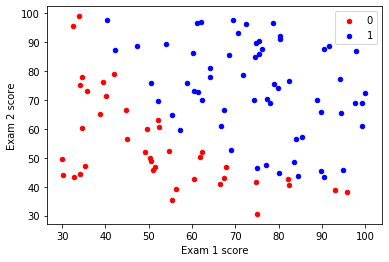

In [3]:
# Let's plot the data next.

import matplotlib
import matplotlib.pyplot as plt
df.columns = ['Exam 1 score','Exam 2 score', 'Result']

colors = {0: 'red',1:'blue'}

_, ax = plt.subplots()
for key,group in df.groupby('Result'):
    group.plot.scatter(ax=ax, x='Exam 1 score', y='Exam 2 score', label=key, color = colors[key]);



In [4]:
import numpy as np

m = df['Exam 1 score'].count()
print("Number of rows/training examples are: ", m)

Number of rows/training examples are:  100


In [5]:
# Let's make our variable matrix X.
# We need to take the exam score columnns from our data and add
# another dimension to accomodate the theta0 intercept term.

exam_1_score = df['Exam 1 score'].to_numpy()
exam_2_score = df['Exam 2 score'].to_numpy()
intercept = np.ones((m))

X = np.hstack((intercept.reshape(-1,1),exam_1_score.reshape(-1,1),exam_2_score.reshape(-1,1)))

print("First 5 rows of X are: ")
print(X[0:5,:])

First 5 rows of X are: 
[[ 1.         34.62365962 78.02469282]
 [ 1.         30.28671077 43.89499752]
 [ 1.         35.84740877 72.90219803]
 [ 1.         60.18259939 86.3085521 ]
 [ 1.         79.03273605 75.34437644]]


In [6]:
# Let's create y
y = df['Result'].to_numpy().reshape(-1,1)

In [7]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

print ('Sigmoid of 0 should be 0.5. We got',sigmoid(0))

Sigmoid of 0 should be 0.5. We got 0.5


In [8]:
# Define h(x) and J(theta)

from math import log

def cost_function(theta, X, y):
    
    m=len(y)
    
    predictions = sigmoid(np.dot(X,theta))
    error = (-y * np.log(predictions)) - ((1-y)*np.log(1-predictions))
    
    cost = 1/m * sum(error)
    
    grad = 1/m * np.dot(X.transpose(),(predictions - y))
    
    return cost[0], grad

In [9]:
# Test out cost function with initial theta.

initial_theta = np.zeros((3,1)).reshape(-1,1)
print("Initial Theta is: ")
print(initial_theta)

print('Cost of initial theta is ', cost_function(initial_theta, X, y)[0])

Initial Theta is: 
[[0.]
 [0.]
 [0.]]
Cost of initial theta is  0.693147180559946


In [10]:
def feature_normalisation(X):
    mean=np.mean(X,axis=0)
    std=np.std(X,axis=0)
    
    X_norm = (X - mean)/std
    
    X_norm[:,0]=1
    
    return X_norm

/home/jonny/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


<Figure size 432x288 with 0 Axes>

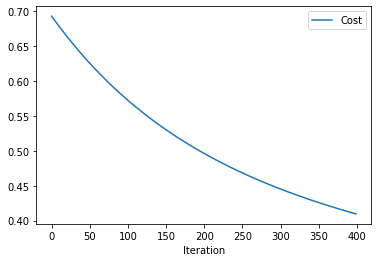

In [11]:
def gradient_descent(X,y,theta,alpha,num_iters):
    
    m=len(y)
    J_history =[]
    iteration_num=[]
    
    for i in range(num_iters):
        cost, grad = cost_function(theta,X,y)
        theta = theta - (alpha * grad)
        J_history.append(cost)
        iteration_num.append(i)
    
    return theta , J_history, iteration_num


X_norm = feature_normalisation(X)

iterations = 400
alpha = 0.01


def train_and_plot(alpha,iterations):
    theta, J_history, iteration_num = gradient_descent(X_norm, y, initial_theta, alpha, iterations)


    # Plot cost over iterations.
    J_df = pd.DataFrame(iteration_num, J_history)
    J_df = pd.DataFrame(
        {'Iteration': iteration_num,
         'Cost': J_history
        })

    J_df.head()

    plt.figure(2) 
    J_df.plot(x='Iteration', y='Cost', kind = 'line')
    plt.show()
    
train_and_plot(alpha,iterations)


<Figure size 432x288 with 0 Axes>

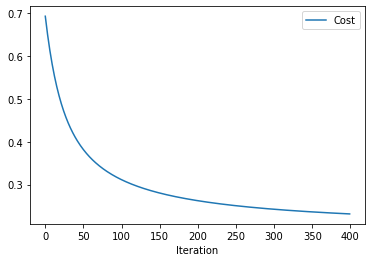

In [12]:
alpha = 0.1
train_and_plot(alpha,iterations)

<Figure size 432x288 with 0 Axes>

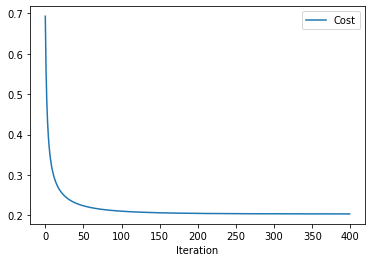

In [13]:
alpha = 1
train_and_plot(alpha,iterations)

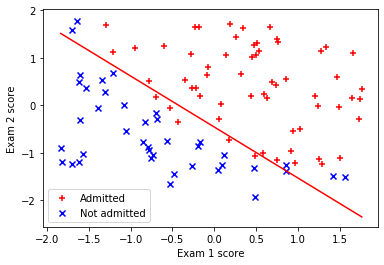

In [14]:
# Alpha = 1 looks good, let's get the theta so we can plot our line.
alpha = 1
theta, J_history, iteration_num = gradient_descent(X_norm, y, initial_theta, alpha, iterations)

pos , neg = (y==1).reshape(100,1) , (y==0).reshape(100,1)
plt.scatter(X_norm[pos[:,0],1],X_norm[pos[:,0],2],c="r",marker="+",label="Admitted")
plt.scatter(X_norm[neg[:,0],1],X_norm[neg[:,0],2],c="b",marker="x",label="Not admitted")
x_value= np.array([np.min(X_norm[:,1]),np.max(X_norm[:,1])])
y_value=-(theta[0] +theta[1]*x_value)/theta[2]
plt.plot(x_value,y_value, "r")
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend(loc=0)


In [15]:
predictions = X_norm.dot(theta)
    
p = predictions>0

print("Train Accuracy:", sum(p==y)[0],"%")

Train Accuracy: 89 %
